# CRISP-DM


# 1. Compr√©hension du m√©tier

L‚Äôobjectif principal est de pr√©dire le prix des actions de Tesla √† partir de donn√©es boursi√®res historiques. Cette pr√©diction peut aider les investisseurs √† prendre de meilleures d√©cisions d‚Äôachat ou de vente.
Les parties prenantes attendent des mod√®les pr√©cis et exploitables, capables d'anticiper les tendances du march√© dans un environnement financier volatil.













# 2. Compr√©hension des donn√©es

Les donn√©es proviennent de Yahoo Finance, incluant les prix de cl√¥ture de Tesla (TSLA_Close) et d'autres grandes entreprises technologiques comme AMZN_Close, GOOGL_Close, NVDA_Close, etc.
Les premi√®res analyses exploratoires ont permis d'identifier les variables fortement corr√©l√©es avec Tesla, utiles comme exog√®nes dans les mod√®les (ex. : AMZN, GOOGL, NVDA).



# 3. Pr√©paration des donn√©es

- Traitement des valeurs manquantes

- Normalisation et d√©coupage temporel des s√©ries

- Transformation des donn√©es pour les adapter aux mod√®les de s√©ries temporelles

- Cr√©ation de variables exog√®nes (donn√©es auxiliaires li√©es √† d'autres actions)

# 4. Mod√©lisation

4 types de mod√®les ont √©t√© exp√©riment√©s :

- ARIMA,SARIMA :

- SARIMAX : Mod√®le classique de s√©ries temporelles avec donn√©es exog√®nes. Il donne de bons r√©sultats sur les tendances g√©n√©rales.

- Prophet : Mod√®le de Facebook performant pour d√©tecter les tendances et saisonnalit√©s. Il a donn√© les meilleurs scores de pr√©cision.

- LSTM (Long Short-Term Memory) : R√©seau de neurones r√©current, utile pour capturer les d√©pendances temporelles non lin√©aires. Le mod√®le LSTM n‚Äôa pas √©t√© concluant dans cette version √† cause d‚Äôun faible score R¬≤.

# 5. √âvaluation

Les mod√®les ont √©t√© compar√©s √† l‚Äôaide de plusieurs m√©triques :

MAE, RMSE, MAPE : pour √©valuer l'erreur de pr√©diction.

R¬≤ : pour mesurer la proportion de variance expliqu√©e.

# 6. D√©ploiement / Plan d‚Äôaction

Le mod√®le Prophet peut √™tre int√©gr√© √† une interface de visualisation ou √† une application pour :

Suivre l'√©volution pr√©dite des actions Tesla

Aider les utilisateurs √† anticiper les fluctuations boursi√®res

Une documentation des r√©sultats, visualisations et m√©triques est pr√©vue dans une pr√©sentation PowerPoint pour les parties prenantes.

In [ ]:
#!pip install yfinance
#!pip install pmdarima
#!pip install tensorflow
#!pip install pmdarima
#!pip install streamlit
#!pip install --upgrade --force-reinstall pmdarima


In [ ]:
# Gestion des donn√©es
import pandas as pd
import numpy as np

#  Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#  Pr√©traitement des donn√©es
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#  Analyse de s√©ries temporelles & statistiques
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import shapiro
from scipy.spatial.distance import cdist

#  Mod√®les de clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#  Mod√©lisation avanc√©e
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from prophet import Prophet

# √âvaluation des mod√®les
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Chargement des donn√©es financi√®res
import yfinance as yf


- TSLA_Close : Tesla, Inc. (Tesla)

- META_Close : Meta Platforms, Inc. (anciennement Facebook)

- GOOGL_Close : Alphabet Inc. (la soci√©t√© m√®re de Google)

- BABA_Close : Alibaba Group Holding Limited (Alibaba)

- AMZN_Close : Amazon.com, Inc. (Amazon)

- F_Close : Ford Motor Company (Ford)

- NVDA_Close : NVIDIA Corporation (NVIDIA)

- ORCL_Close : Oracle Corporation (Oracle)

- GM_Close : General Motors Company (GM)

- TM_Close : Toyota Motor Corporation (Toyota)

- HMC_Close : Honda Motor Co., Ltd. (Honda)

In [ ]:

# D√©finir les tickers des actions
stocks = ["TSLA", "META", "GOOGL", "BABA", "AMZN", "F", "NVDA", "ORCL", "GM","TM", "HMC" ]

# D√©finir la p√©riode
start_date = "2015-01-01"
end_date = "2025-03-13"

# R√©cup√©rer les donn√©es historiques sur la p√©riode d√©finie
data_frames = []
for ticker in stocks:
    df = yf.Ticker(ticker).history(start=start_date, end=end_date)
    df = df[["Close"]]
    df.columns = [f"{ticker}_{col}" for col in df.columns]
    data_frames.append(df)

# Concat√©ner toutes les donn√©es dans un seul DataFrame
data = pd.concat(data_frames, axis=1)


# PARTIE A : ANALYSE ET PR√âTRAITEMENT

## 1. Exploration et reporting

In [ ]:
# L'objectif est d'obtenir une premi√®re compr√©hension des donn√©es et de rep√©rer d'√©ventuelles anomalies.

In [ ]:
# V√©rifier les 5 premi√®res lignes du dataset
data.head(5)

TSLA_Close  META_Close  GOOGL_Close  BABA_Close  \
Date                                                                         
2015-01-02 00:00:00-05:00   14.620667   78.082001    26.351515  100.051353   
2015-01-05 00:00:00-05:00   14.006000   76.827919    25.849415   97.540405   
2015-01-06 00:00:00-05:00   14.085333   75.792793    25.211466   99.780937   
2015-01-07 00:00:00-05:00   14.063333   75.792793    25.137321   98.631699   
2015-01-08 00:00:00-05:00   14.041333   77.813263    25.224903  101.432373   

                           AMZN_Close   F_Close  NVDA_Close  ORCL_Close  \
Date                                                                      
2015-01-02 00:00:00-05:00     15.4260  8.870362    0.483099   37.728313   
2015-01-05 00:00:00-05:00     15.1095  8.523865    0.474940   37.199226   
2015-01-06 00:00:00-05:00     14.7645  8.443014    0.460540   36.815193   
2015-01-07 00:00:00-05:00     14.9210  8.685564    0.459340   36.823723   
2015-01-08 00:00:00-05:00     15.0230  8.905013    0.476619   37.045601   

                            GM_Close    TM_Close  HMC_Close  
Date                                                         
2015-01-02 00:00:00-05:00  27.108501  118.139420  23.737602  
2015-01-05 00:00:00-05:00  26.711674  115.977249  23.248247  
2015-01-06 00:00:00-05:00  27.116280  114.783340  23.119898  
2015-01-07 00:00:00-05:00  27.886589  117.669388  23.352541  
2015-01-08 00:00:00-05:00  28.166693  119.934967  23.649357

In [ ]:
# Afficher la liste des variables
data.columns.tolist()

['TSLA_Close',
 'META_Close',
 'GOOGL_Close',
 'BABA_Close',
 'AMZN_Close',
 'F_Close',
 'NVDA_Close',
 'ORCL_Close',
 'GM_Close',
 'TM_Close',
 'HMC_Close']

In [ ]:
# Afficher le nbre d'observations et variables du dataset
data.shape

(2563, 11)

In [ ]:
# Afficher des informations g√©n√©rales sur le dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2563 entries, 2015-01-02 00:00:00-05:00 to 2025-03-12 00:00:00-04:00
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TSLA_Close   2563 non-null   float64
 1   META_Close   2563 non-null   float64
 2   GOOGL_Close  2563 non-null   float64
 3   BABA_Close   2563 non-null   float64
 4   AMZN_Close   2563 non-null   float64
 5   F_Close      2563 non-null   float64
 6   NVDA_Close   2563 non-null   float64
 7   ORCL_Close   2563 non-null   float64
 8   GM_Close     2563 non-null   float64
 9   TM_Close     2563 non-null   float64
 10  HMC_Close    2563 non-null   float64
dtypes: float64(11)
memory usage: 240.3 KB


In [ ]:
# R√©sum√© statistique des donn√©es
data.describe(include = "number")

TSLA_Close   META_Close  GOOGL_Close   BABA_Close   AMZN_Close  \
count  2563.000000  2563.000000  2563.000000  2563.000000  2563.000000   
mean    120.068665   229.307530    84.246357   131.716132   103.457297   
std     117.897874   133.889365    45.389235    57.039553    56.114817   
min       9.578000    73.702644    24.734745    55.424198    14.347500   
25%      17.332999   136.969460    47.477512    82.274998    48.810001   
50%      34.933334   183.624573    66.359741   108.250534    95.143997   
75%     224.040001   289.216919   121.753147   173.839218   155.569000   
max     479.859985   736.015198   206.142593   306.276886   242.059998   

           F_Close   NVDA_Close   ORCL_Close     GM_Close     TM_Close  \
count  2563.000000  2563.000000  2563.000000  2563.000000  2563.000000   
mean      8.955682    22.784298    66.344882    36.003759   143.397063   
std       2.379001    35.223892    36.174310     9.340436    30.923004   
min       3.164624     0.459340    29.410698    16.335400    96.798271   
25%       7.361932     3.584591    40.481388    29.183729   120.704975   
50%       8.515285     6.612067    50.349648    34.101421   134.029999   
75%      10.470631    22.266551    83.787060    39.664047   165.575005   
max      19.979618   149.416245   191.271088    63.921967   254.770004   

         HMC_Close  
count  2563.000000  
mean     26.062270  
std       3.482648  
min      17.586300  
25%      23.494050  
50%      25.430357  
75%      28.072147  
max      37.680000

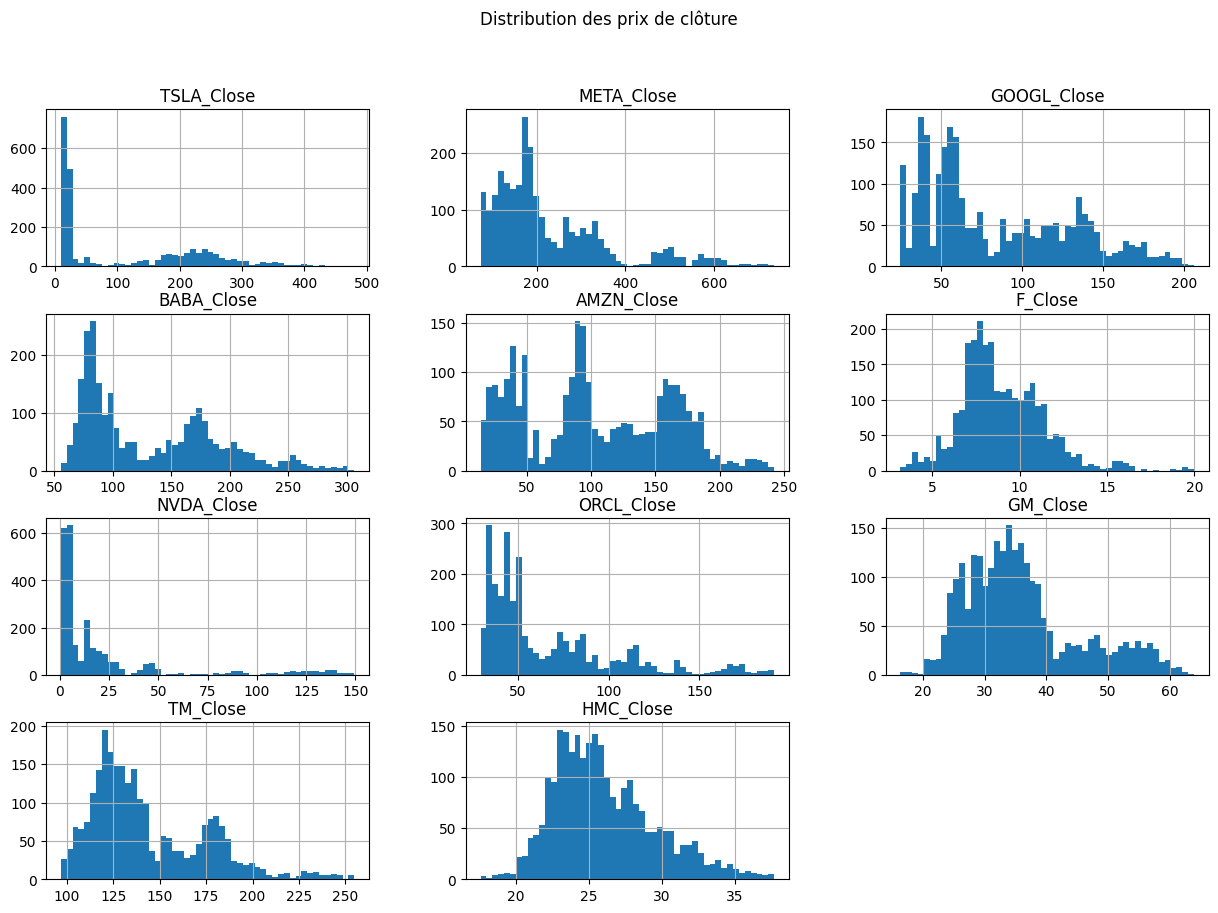

In [ ]:
# Tracer les distributions des prix de cl√¥ture des actions
data.hist(figsize=(15, 10), bins=50)
plt.suptitle("Distribution des prix de cl√¥ture")
plt.show()

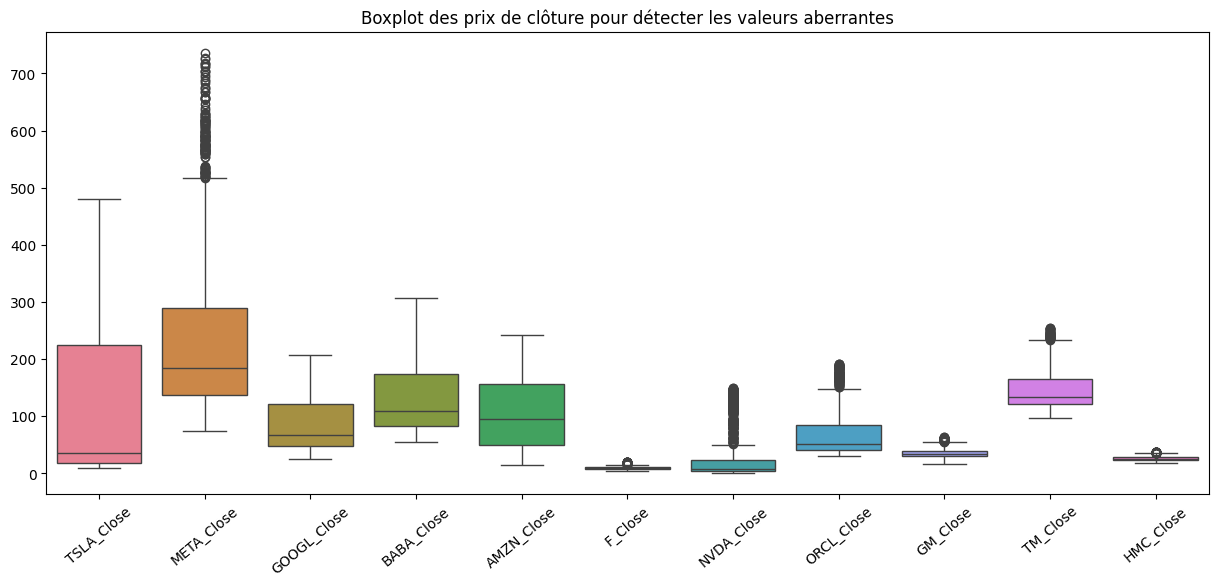

In [ ]:
# Tracer des boxplots pour d√©tecter des valeurs aberrantes
plt.figure(figsize=(15, 6))
sns.boxplot(data=data)
plt.xticks(rotation=40)
plt.title("Boxplot des prix de cl√¥ture pour d√©tecter les valeurs aberrantes")
plt.show()

## 2Ô∏è- Pr√©traitement des donn√©es

#### Valeurs manquantes

In [ ]:
# Somme des valeurs manquantes
valeur_manq = data.isnull().sum()

# Pourcentage des valeurs manquantes
pourc_valeur_manq = (valeur_manq / len(data)) * 100

# Tableau des valeurs manquantes par variables
table_valeur_manq = pd.DataFrame({ "Valeur_manquante": valeur_manq, "Porcentage": pourc_valeur_manq})
print(table_valeur_manq)

             Valeur_manquante  Porcentage
TSLA_Close                  0         0.0
META_Close                  0         0.0
GOOGL_Close                 0         0.0
BABA_Close                  0         0.0
AMZN_Close                  0         0.0
F_Close                     0         0.0
NVDA_Close                  0         0.0
ORCL_Close                  0         0.0
GM_Close                    0         0.0
TM_Close                    0         0.0
HMC_Close                   0         0.0


Notre jeu de donn√©e ne pr√©sente aucune valeur manquante

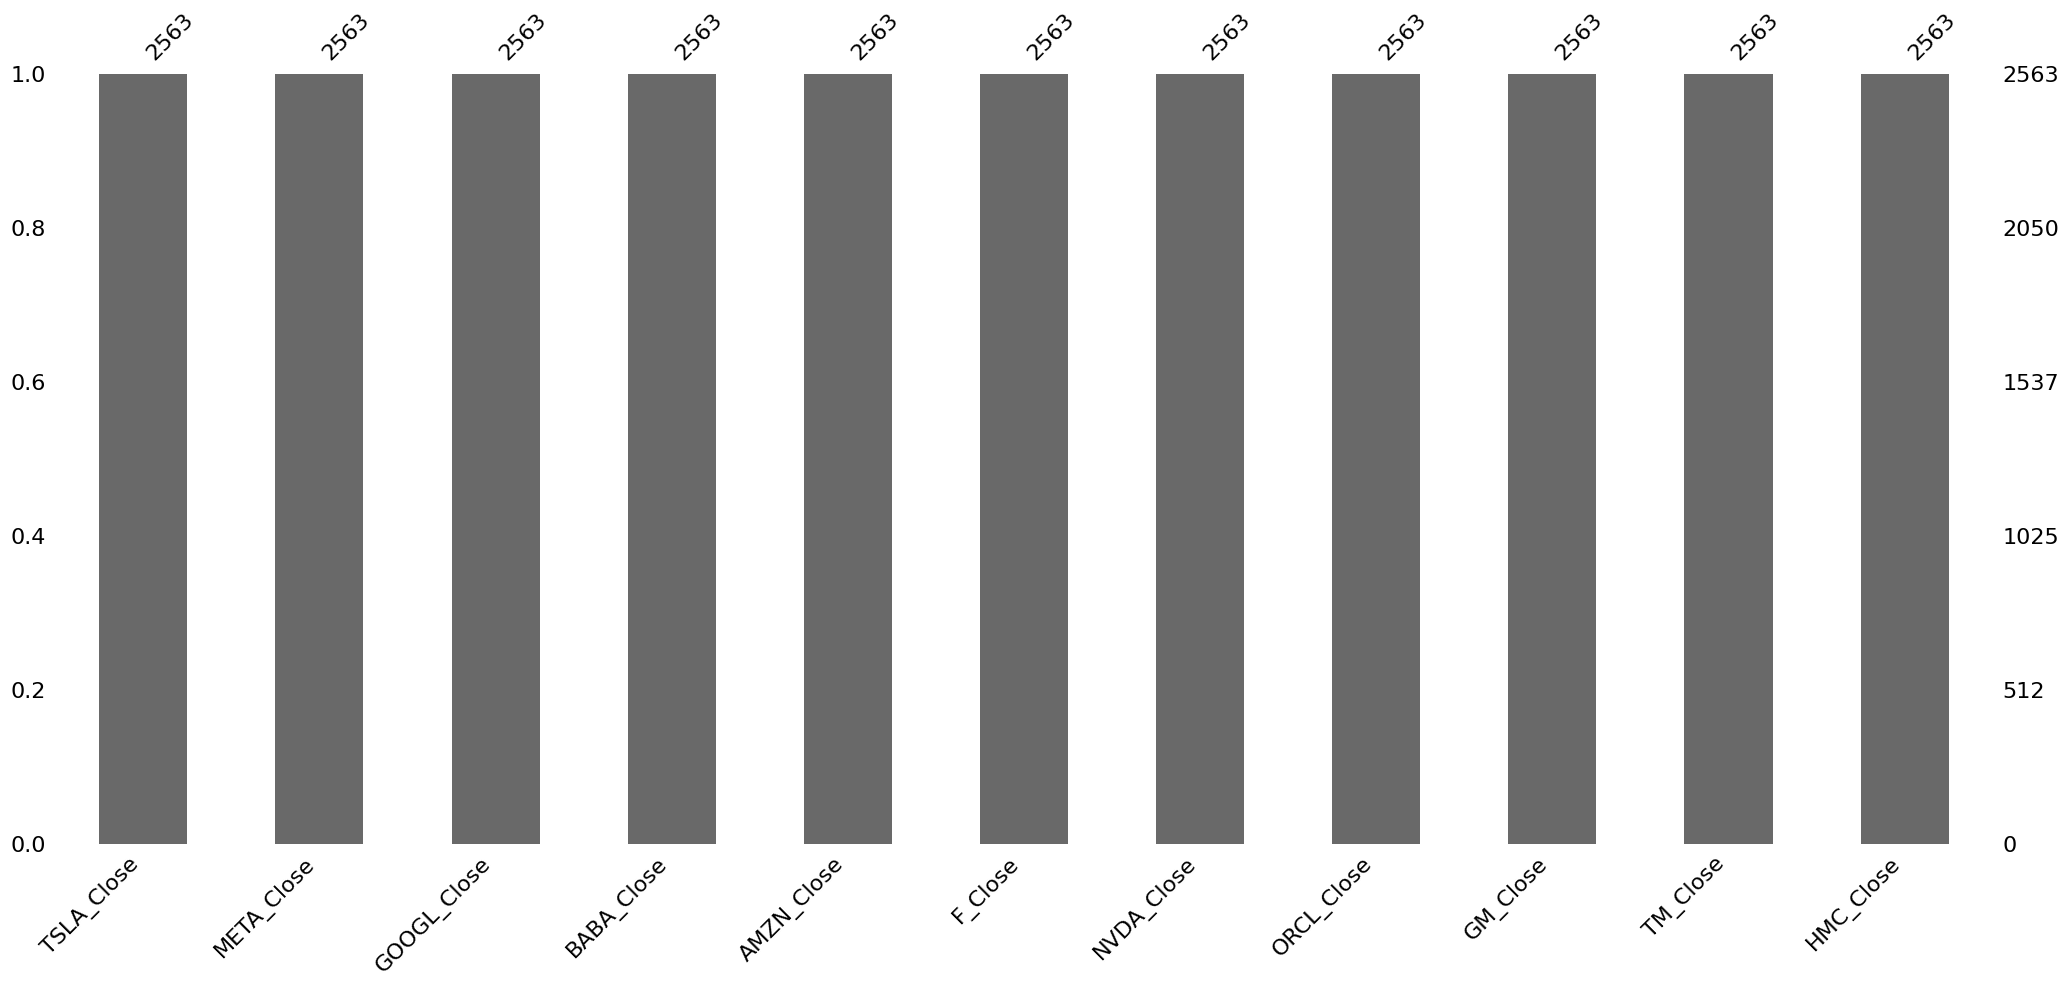

In [ ]:
# Visualisation des valeurs manquantes sous forme barplot avec le package "missingno"
msno.bar(data)
plt.show()

#### Standardisation

In [ ]:
data_stand = data.copy()
data_nor = data.copy()

In [ ]:
# Standardisation
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data_stand.columns, index=data_stand.index)

print(data_scaled.head())


                           TSLA_Close  META_Close  GOOGL_Close  BABA_Close  \
Date                                                                         
2015-01-02 00:00:00-05:00   -0.894576   -1.129702    -1.275768   -0.555246   
2015-01-05 00:00:00-05:00   -0.899790   -1.139070    -1.286832   -0.599275   
2015-01-06 00:00:00-05:00   -0.899117   -1.146803    -1.300890   -0.559987   
2015-01-07 00:00:00-05:00   -0.899304   -1.146803    -1.302524   -0.580139   
2015-01-08 00:00:00-05:00   -0.899491   -1.131709    -1.300594   -0.531029   

                           AMZN_Close   F_Close  NVDA_Close  ORCL_Close  \
Date                                                                      
2015-01-02 00:00:00-05:00   -1.569077 -0.035871   -0.633251   -0.791229   
2015-01-05 00:00:00-05:00   -1.574718 -0.181547   -0.633482   -0.805858   
2015-01-06 00:00:00-05:00   -1.580868 -0.215539   -0.633891   -0.816476   
2015-01-07 00:00:00-05:00   -1.578078 -0.113565   -0.633925   -0.816240   
201

#### Normalisation

In [ ]:
# Normalisation

# Cr√©ation d'un objet MinMaxScaler
minmax_scaler = MinMaxScaler()

# Application de la normalisation Min-Max aux donn√©es
data_normalized = pd.DataFrame(minmax_scaler.fit_transform(data_nor),
                               columns=data_nor.columns,
                               index=data_nor.index)

# Afficher un aper√ßu des donn√©es normalis√©es
print(data_normalized.head())

                           TSLA_Close  META_Close  GOOGL_Close  BABA_Close  \
Date                                                                         
2015-01-02 00:00:00-05:00    0.010723    0.006612     0.008912    0.177902   
2015-01-05 00:00:00-05:00    0.009416    0.004719     0.006145    0.167892   
2015-01-06 00:00:00-05:00    0.009584    0.003156     0.002628    0.176824   
2015-01-07 00:00:00-05:00    0.009538    0.003156     0.002219    0.172243   
2015-01-08 00:00:00-05:00    0.009491    0.006206     0.002702    0.183407   

                           AMZN_Close   F_Close  NVDA_Close  ORCL_Close  \
Date                                                                      
2015-01-02 00:00:00-05:00    0.004736  0.339324    0.000160    0.051388   
2015-01-05 00:00:00-05:00    0.003346  0.318718    0.000105    0.048119   
2015-01-06 00:00:00-05:00    0.001831  0.313910    0.000008    0.045746   
2015-01-07 00:00:00-05:00    0.002519  0.328334    0.000000    0.045799   
201

## 3- Segmentation du march√© boursier (Clustering)

#### Appliquer K-Means avec k=2

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data_scaled["Cluster_KMeans"] = kmeans.fit_predict(data_scaled)

# Afficher le nombre d'actions dans chaque cluster
print(data_scaled["Cluster_KMeans"].value_counts())

# Visualiser les centres des clusters
print(pd.DataFrame(kmeans.cluster_centers_, columns=data.columns))


Cluster_KMeans
0    1738
1     825
Name: count, dtype: int64
   TSLA_Close  META_Close  GOOGL_Close  BABA_Close  AMZN_Close   F_Close  \
0   -0.562818   -0.527130    -0.598159    0.120644   -0.528919 -0.491566   
1    1.185670    1.110488     1.260121   -0.254156    1.114256  1.035566   

   NVDA_Close  ORCL_Close  GM_Close  TM_Close  HMC_Close  
0   -0.473790   -0.539645 -0.487918 -0.580571  -0.468815  
1    0.998118    1.136851  1.027881  1.223069   0.987637  


#### Nombre optimal de clusters avec M√©thode du coude

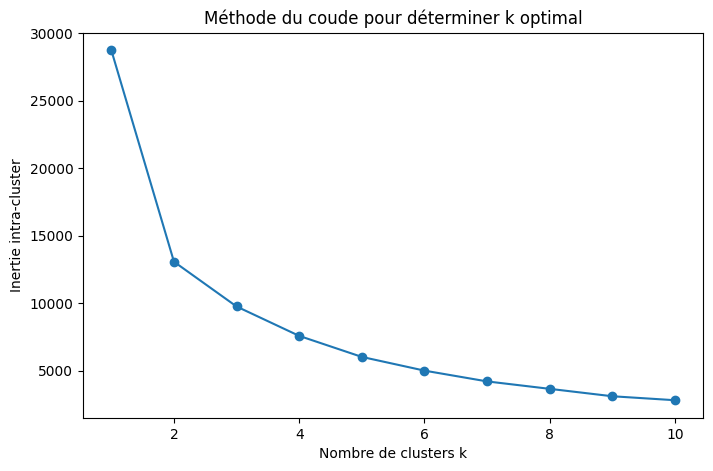

In [ ]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Nombre de clusters k")
plt.ylabel("Inertie intra-cluster")
plt.title("M√©thode du coude pour d√©terminer k optimal")
plt.show()


#### Score de silhouette

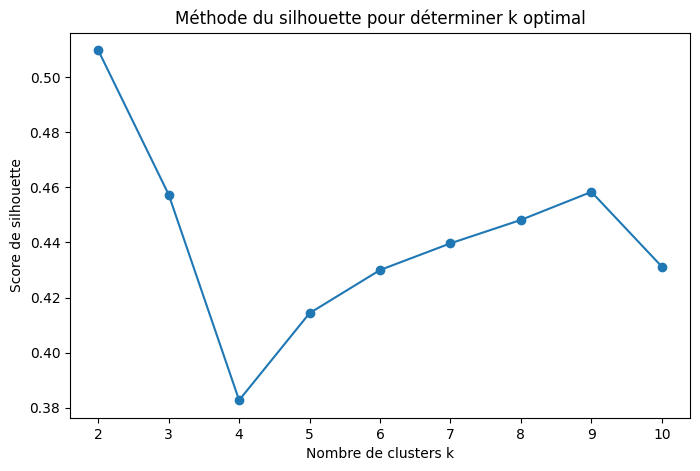

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, cluster_labels))

# Tracer le score de silhouette
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Nombre de clusters k")
plt.ylabel("Score de silhouette")
plt.title("M√©thode du silhouette pour d√©terminer k optimal")
plt.show()


#### Visualiser les clusters avec ACP

In [ ]:
print(data_scaled.columns)


Index(['TSLA_Close', 'META_Close', 'GOOGL_Close', 'BABA_Close', 'AMZN_Close',
       'F_Close', 'NVDA_Close', 'ORCL_Close', 'GM_Close', 'TM_Close',
       'HMC_Close', 'Cluster_KMeans'],
      dtype='object')


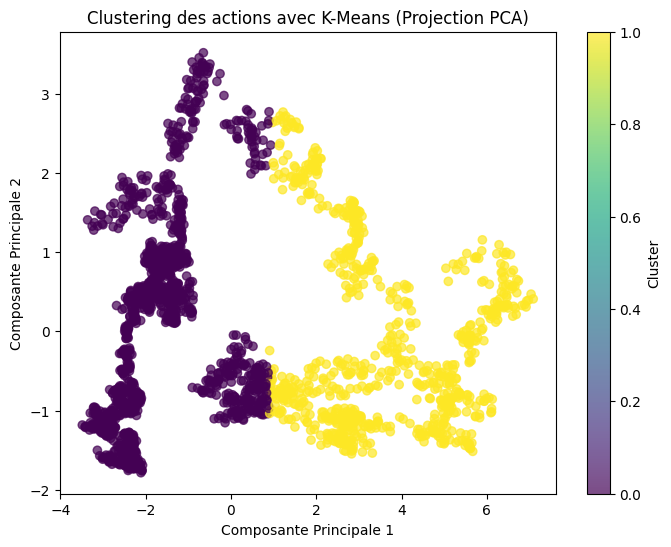

In [ ]:
from sklearn.decomposition import PCA

# R√©duction de dimension avec ACP (2D)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled.drop(["Cluster_KMeans"], axis=1))
data_scaled["PC1"] = pca_result[:,0]
data_scaled["PC2"] = pca_result[:,1]

# Tracer les clusters obtenus avec K-Means
plt.figure(figsize=(8,6))
plt.scatter(data_scaled["PC1"], data_scaled["PC2"], c=data_scaled["Cluster_KMeans"], cmap='viridis', alpha=0.7)
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Clustering des actions avec K-Means (Projection PCA)")
plt.colorbar(label="Cluster")
plt.show()


### Clusters des entreprises

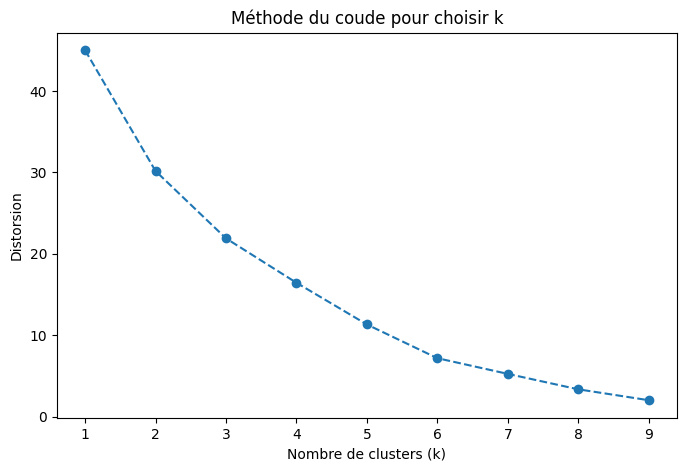

In [ ]:

df = data[['TSLA_Close', 'META_Close', 'GOOGL_Close', 'BABA_Close',
           'AMZN_Close', 'F_Close', 'NVDA_Close', 'ORCL_Close',
           'GM_Close', 'TM_Close', 'HMC_Close']]

# Standardiser les donn√©es pour √©viter l'effet d'√©chelle
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.T)  # Transposition pour regrouper les entreprises

# Trouver le nombre optimal de clusters avec la m√©thode du coude
distortions = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    distortions.append(sum(np.min(cdist(df_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])

# Tracer la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(K_range, distortions, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Distorsion')
plt.title('M√©thode du coude pour choisir k')
plt.show()

In [ ]:
# Appliquer K-Means avec le nombre optimal de clusters (ex: k=3)
k_optimal = 3  # Remplace par la meilleure valeur apr√®s analyse du coude
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

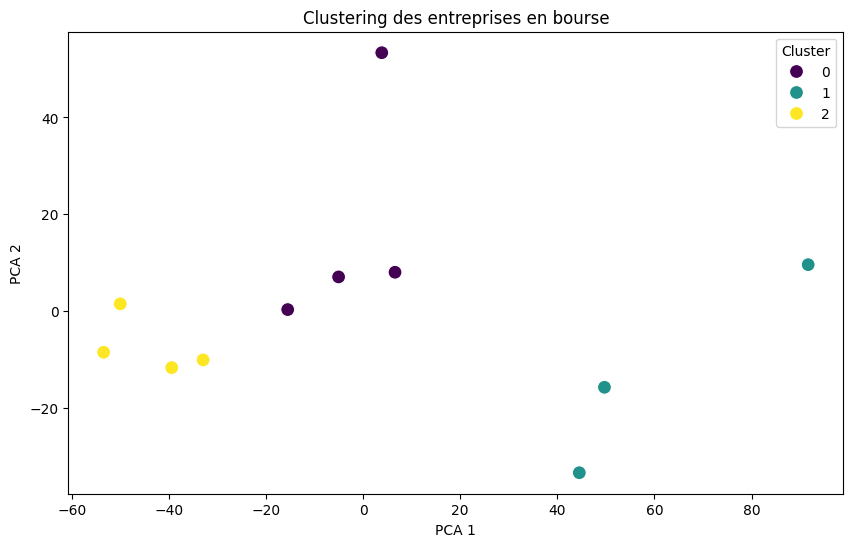

In [ ]:
# Ajouter les clusters au dataframe
df_clusters = pd.DataFrame(df.T)
df_clusters['Cluster'] = clusters

# Visualisation avec PCA (R√©duction en 2D)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=100)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustering des entreprises en bourse')
plt.legend(title='Cluster')
plt.show()



In [ ]:
# Affichage des entreprises et leurs clusters

# Trier les entreprises par cluster
df_clusters_sorted = df_clusters[['Cluster']].sort_values(by="Cluster")

# Afficher les r√©sultats tri√©s
print(df_clusters_sorted)


Date         Cluster
TSLA_Close         0
GOOGL_Close        0
ORCL_Close         0
AMZN_Close         0
BABA_Close         1
META_Close         1
TM_Close           1
F_Close            2
NVDA_Close         2
GM_Close           2
HMC_Close          2


## 4- D√©tection d‚Äôanomalies

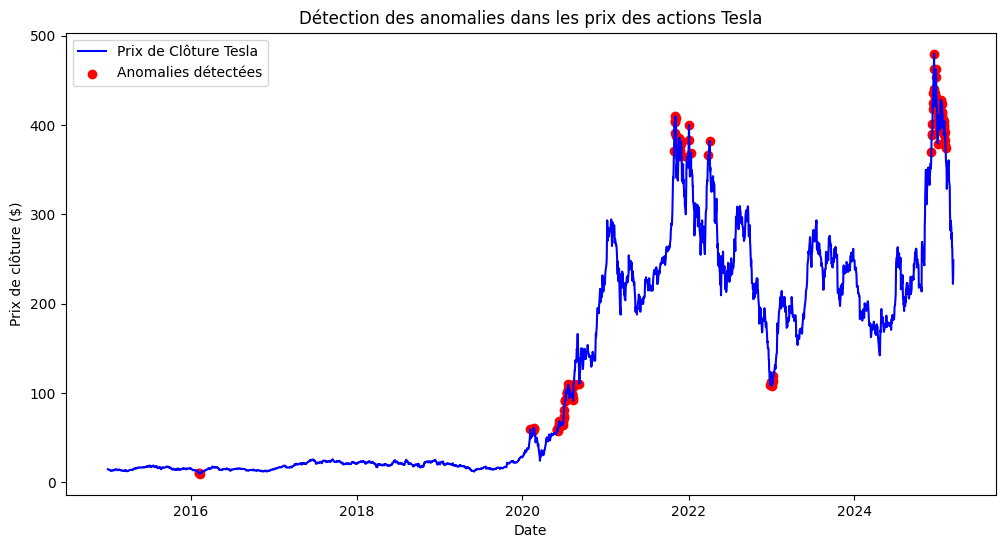

üìå Jours d√©tect√©s comme anomalies :
                           TSLA_Close
Date                                 
2016-02-08 00:00:00-05:00    9.866000
2016-02-09 00:00:00-05:00    9.883333
2016-02-10 00:00:00-05:00    9.578000
2020-02-04 00:00:00-05:00   59.137333
2020-02-18 00:00:00-05:00   57.226665
...                               ...
2025-01-31 00:00:00-05:00  404.600006
2025-02-03 00:00:00-05:00  383.679993
2025-02-04 00:00:00-05:00  392.209991
2025-02-05 00:00:00-05:00  378.170013
2025-02-06 00:00:00-05:00  374.320007

[129 rows x 1 columns]


In [ ]:

from sklearn.ensemble import IsolationForest

# Charger les donn√©es (supposons que 'data' contient d√©j√† les prix des actions)
df_tesla = data[['TSLA_Close']].copy()  # On travaille d'abord sur Tesla

# Param√®tres du mod√®le Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)  # 5% de contamination = anomalies

# Appliquer le mod√®le sur les prix de Tesla
df_tesla['Anomaly'] = model.fit_predict(df_tesla)

# Filtrer les anomalies (-1 = anomalie d√©tect√©e)
anomalies = df_tesla[df_tesla['Anomaly'] == -1]

# Visualisation des anomalies sur la courbe des prix
plt.figure(figsize=(12,6))
plt.plot(df.index, df_tesla['TSLA_Close'], label='Prix de Cl√¥ture Tesla', color='blue')
plt.scatter(anomalies.index, anomalies['TSLA_Close'], color='red', label='Anomalies d√©tect√©es', marker='o')
plt.xlabel('Date')
plt.ylabel('Prix de cl√¥ture ($)')
plt.title('D√©tection des anomalies dans les prix des actions Tesla')
plt.legend()
plt.show()

# Afficher les dates et prix des anomalies
print("üìå Jours d√©tect√©s comme anomalies :")
print(anomalies[['TSLA_Close']])


# PARTIE B : PR√âVISION DES ACTIONS DE TESLA

In [ ]:
# Charger les donn√©es de Tesla (TSLA_Close)
df_tesla = data[['TSLA_Close']].copy()

#  Statistiques descriptives
print("Statistiques Descriptives de Tesla :")
print(df_tesla.describe())

Statistiques Descriptives de Tesla :
        TSLA_Close
count  2563.000000
mean    120.068665
std     117.897874
min       9.578000
25%      17.332999
50%      34.933334
75%     224.040001
max     479.859985


#### Test de normalit√©

<Axes: ylabel='Density'>

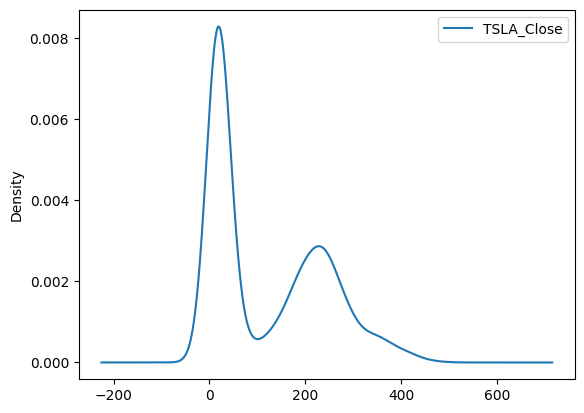

In [ ]:
df_tesla.plot(kind= "density")

In [ ]:
df_tesla.skew() #la distribution(repartition) n'est pas symetrique (skew>0), elle est decall√©e vers la droite

TSLA_Close    0.645382
dtype: float64

In [ ]:
import scipy.stats
scipy.stats.shapiro(df_tesla)[1]  #H0: la variable suit la loi normale, c'est √† dire elle est issue du hasard

np.float64(2.1402114968717087e-47)

### Dispersion ou coefficient de variation

In [ ]:
dispersion_moyenne=data["TSLA_Close"].std()/data["TSLA_Close"].mean()*100  #dispersion=std/mean*100
dispersion_moyenne

np.float64(98.19204154543405)

In [ ]:
dispersion=data.std(numeric_only=True)/data.mean(numeric_only=True)*100
#dispersion=data.std(numeric_only=True)/data.mean(numeric_only=True)*100

dispersion.sort_values()

HMC_Close       13.362794
TM_Close        21.564601
GM_Close        25.942946
F_Close         26.564158
BABA_Close      43.304911
GOOGL_Close     53.876792
AMZN_Close      54.239593
ORCL_Close      54.524644
META_Close      58.388560
TSLA_Close      98.192042
NVDA_Close     154.597226
dtype: float64

<Axes: >

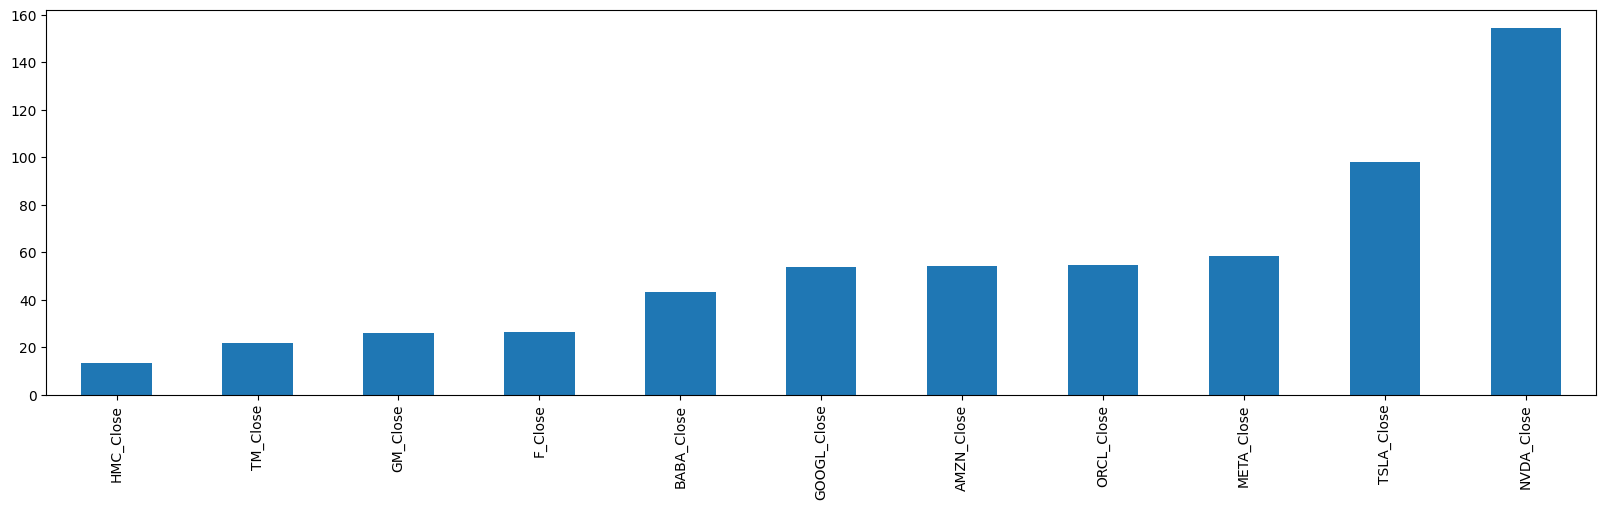

In [ ]:
dispersion.sort_values().plot(kind="bar", figsize=(20,5))

Nous pouvons remarquer un taux de disperssion (98.192042) > 50% qui indique que les actions de tesla sont tr√®s dispers√© dans le temps. Le prix des actions de Tesla evolue fortement depuis 2015.

## 1. Analyse des donn√©es de Tesla

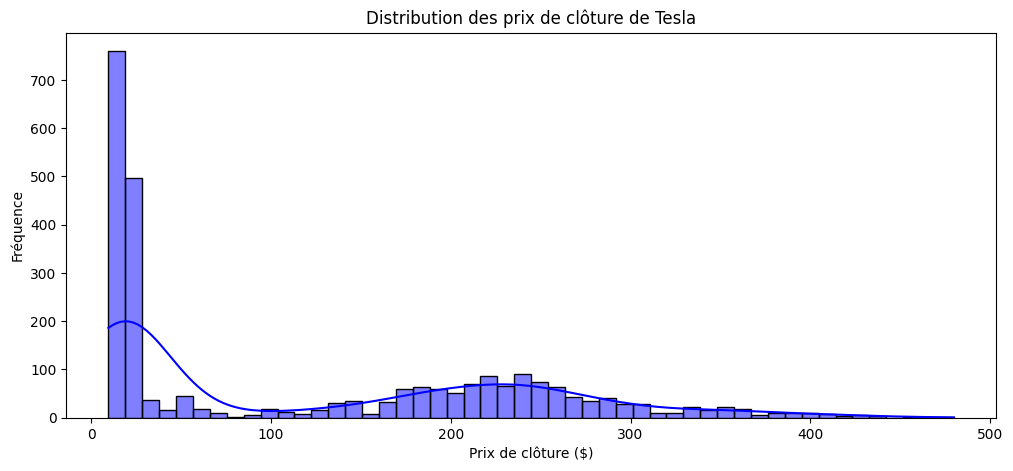

In [ ]:
#  Visualisation de la distribution des prix
plt.figure(figsize=(12,5))
sns.histplot(df_tesla['TSLA_Close'], bins=50, kde=True, color='blue')
plt.title("Distribution des prix de cl√¥ture de Tesla")
plt.xlabel("Prix de cl√¥ture ($)")
plt.ylabel("Fr√©quence")
plt.show()

In [ ]:
#  Test de normalit√© de Shapiro-Wilk
stat, p = shapiro(df_tesla['TSLA_Close'])
print(f"Test de Shapiro-Wilk: Statistique={stat:.3f}, p-valeur={p:.5f}")

#  Interpr√©tation
if p > 0.05:
    print(" Les prix des actions suivent une distribution normale (p > 0.05)")
else:
    print(" Les prix ne suivent PAS une distribution normale (p < 0.05)")


Test de Shapiro-Wilk: Statistique=0.815, p-valeur=0.00000
 Les prix ne suivent PAS une distribution normale (p < 0.05)


### V√©rification de la stationnarit√© (Test de Dickey-Fuller)

In [ ]:
# Test de stationnarit√© (Dickey-Fuller)
result = adfuller(df_tesla['TSLA_Close'])
print(f"Test de Dickey-Fuller : Statistique={result[0]:.3f}, p-valeur={result[1]:.5f}")

#  Interpr√©tation
if result[1] < 0.05:
    print("La s√©rie est stationnaire (p < 0.05)")
else:
    print(" La s√©rie n'est PAS stationnaire (p > 0.05) - Transformation n√©cessaire")

# H‚ÇÄ (hypoth√®se nulle) : La s√©rie n‚Äôest pas stationnaire (elle a une racine unitaire).

# H‚ÇÅ (hypoth√®se alternative) : La s√©rie est stationnaire.


Test de Dickey-Fuller : Statistique=-1.521, p-valeur=0.52317
 La s√©rie n'est PAS stationnaire (p > 0.05) - Transformation n√©cessaire


<Axes: xlabel='Date'>

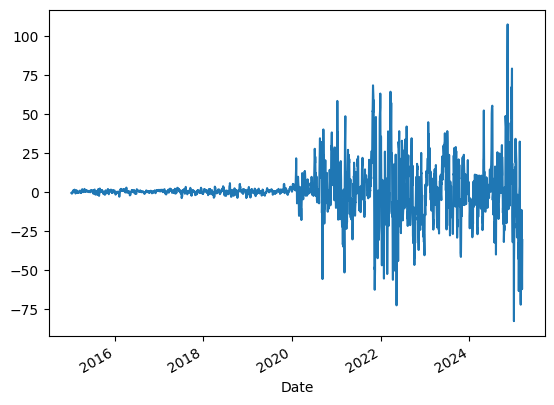

In [ ]:
y=data["TSLA_Close"].diff(5)
y.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller as DukeyFuller_test
DukeyFuller_test(data["TSLA_Close"])[1]

np.float64(0.5231691402263818)

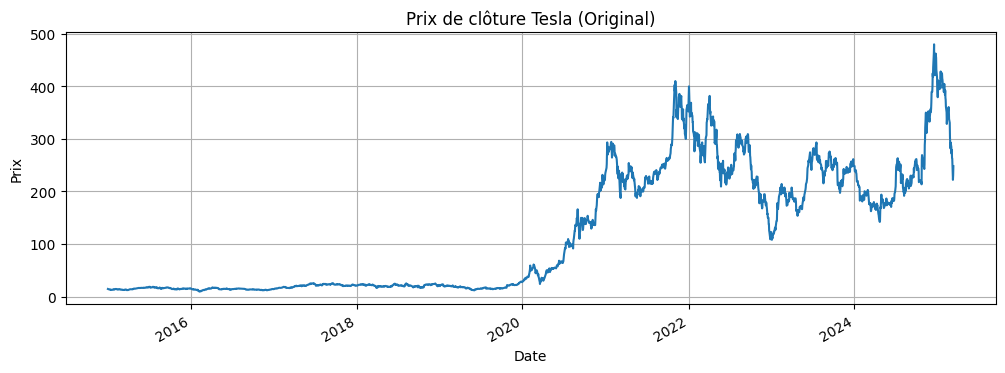

In [ ]:
import matplotlib.pyplot as plt

# Tracer la s√©rie originale
data['TSLA_Close'].plot(figsize=(12, 4), title='Prix de cl√¥ture Tesla (Original)', ylabel='Prix')
plt.grid(True)
plt.show()


### Diff√©renciation de la s√©rie (rendre la s√©rie stationnaire)

Date
2015-01-05 00:00:00-05:00   -0.614668
2015-01-06 00:00:00-05:00    0.079333
2015-01-07 00:00:00-05:00   -0.022000
2015-01-08 00:00:00-05:00   -0.021999
2015-01-09 00:00:00-05:00   -0.264000
Name: TSLA_Close, dtype: float64


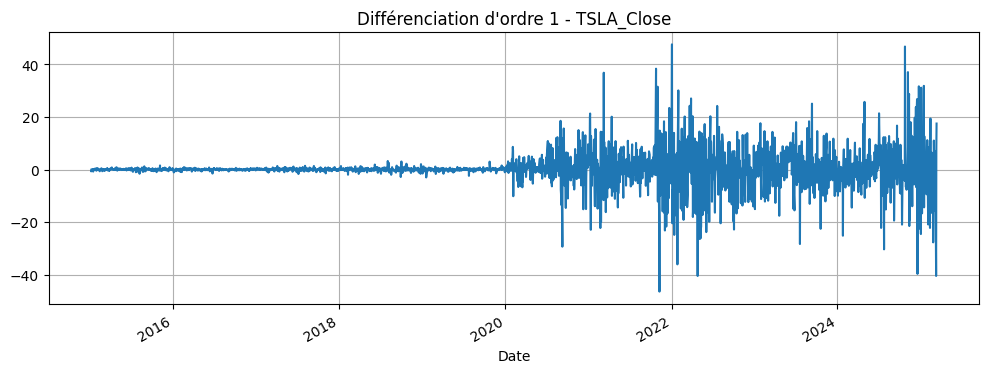

In [ ]:
tsla_diff = data['TSLA_Close'].diff().dropna()

# Afficher un aper√ßu
print(tsla_diff.head())

# Tracer la s√©rie diff√©renci√©e
tsla_diff.plot(figsize=(12, 4), title='Diff√©renciation d\'ordre 1 - TSLA_Close')
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(tsla_diff)
print(f"ADF Statistic : {result[0]}")
print(f"p-value : {result[1]}")


ADF Statistic : -8.970320931463869
p-value : 7.785584923106454e-15


## 2. Mod√®le ARIMA, SARIMA

#### ARIMA(p,d,q) ‚Äì sans saisonnalit√©

In [ ]:
"""from pmdarima.arima import auto_arima

auto_model = auto_arima(df['TSLA_Close'], seasonal=False, trace=True)
print(auto_model.summary())


ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_arima = SARIMAX(df['TSLA_Close'], order=auto_model.order)
results_arima = model_arima.fit(disp=False)

print(results_arima.summary())
results_arima.plot_diagnostics(figsize=(12,6))


#### SARIMA(p,d,q)(P,D,Q,s) ‚Äì avec saisonnalit√©

In [ ]:
# On extrait la s√©rie temporelle Tesla (avec index = Date)
y = data['TSLA_Close'].asfreq('B')  # 'B' = jours ouvr√©s (march√© boursier)

# Si la s√©rie a des valeurs manquantes, on les impute par interpolation
y = y.interpolate()


##### Trouver automatiquement les meilleurs param√®tres SARIMA avec auto_arima


In [ ]:
# Recherche automatique des param√®tres optimaux (p,d,q)(P,D,Q,s)
auto_model = pm.auto_arima(
    y,
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    start_d=0, max_d=2,
    start_P=0, max_P=3,
    start_Q=0, max_Q=3,
    start_D=0, max_D=2,
    m=21,  # ‚âà 1 mois boursier (21 jours ouvr√©s)
    seasonal=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Afficher les meilleurs param√®tres
print("Meilleurs param√®tres trouv√©s :", auto_model.order, auto_model.seasonal_order)


NameError: name 'pm' is not defined

##### Construire le mod√®le SARIMA avec les meilleurs param√®tres

In [ ]:
# Extraire les param√®tres recommand√©s
p, d, q = auto_model.order
P, D, Q, s = auto_model.seasonal_order

# Cr√©er le mod√®le SARIMA
model = SARIMAX(y, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# R√©sum√© des r√©sultats
print(results.summary())


##### Visualiser les pr√©dictions vs donn√©es r√©elles

In [ ]:
# Pr√©diction sur les 30 prochains jours
forecast = results.get_forecast(steps=30)
conf_int = forecast.conf_int()

# Tracer les r√©sultats
plt.figure(figsize=(15, 5))
plt.plot(y, label="Donn√©es historiques")
plt.plot(forecast.predicted_mean, label="Pr√©visions")
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightblue', alpha=0.4)
plt.title("Pr√©vision du prix de l'action Tesla avec SARIMA")
plt.xlabel("Date")
plt.ylabel("Prix de cl√¥ture")
plt.legend()
plt.show()


##### Precision du modele

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# √âtape 1 : Pr√©diction sur les 119 prochains jours
steps_a_predire = 119
predictions = results.forecast(steps=steps_a_predire)

# √âtape 2 : R√©cup√©rer les vraies valeurs correspondantes (si disponibles)
# On suppose que 'data' contient les vraies valeurs futures de 'TSLA_Close'
# D√©caler pour que les index correspondent
date_debut = predictions.index[0]
date_fin = predictions.index[-1]

# V√©rifier si on a les vraies valeurs dans la base (sinon on peut les simuler ou ignorer l'√©valuation)
if date_fin in data.index:
    reel = data.loc[date_debut:date_fin, 'TSLA_Close']
else:
    print(" Pas de vraies valeurs disponibles pour les dates de pr√©diction. Comparaison partielle.")
    reel = data['TSLA_Close'].iloc[-steps_a_predire:]  # on prend les derni√®res valeurs disponibles

# √âtape 3 : Cr√©er le DataFrame de comparaison
resultats = pd.DataFrame(index=predictions.index)
resultats['reel'] = reel.values[:steps_a_predire]
resultats['pred'] = predictions.values[:steps_a_predire]
resultats['erreur relative (%)'] = abs((resultats['pred'] - resultats['reel']) / resultats['reel']) * 100

# √âtape 4 : Calcul des m√©triques
mae = mean_absolute_error(resultats['reel'], resultats['pred'])
mse = mean_squared_error(resultats['reel'], resultats['pred'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((resultats['reel'] - resultats['pred']) / resultats['reel'])) * 100

# √âtape 5 : Affichage des r√©sultats
print(" √âvaluation du mod√®le SARIMA sur les donn√©es Tesla :")
print(f"MAE  = {mae:.2f}   Erreur absolue moyenne")
print(f"RMSE = {rmse:.2f}  Erreur quadratique moyenne")
print(f"MAPE = {mape:.2f}%  Erreur relative moyenne")

# Affichage al√©atoire de 20 lignes du tableau de r√©sultats
print("\n √âchantillon des r√©sultats :")
print(resultats.sample(20))


AttributeError: 'dict' object has no attribute 'forecast'

## 3. Test de causalit√© de Granger

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Variables candidates √† tester
candidates = ['META_Close', 'GOOGL_Close', 'AMZN_Close', 'NVDA_Close', 'BABA_Close']

# Pr√©parer les donn√©es
df_granger = data[['TSLA_Close'] + candidates].copy()
df_granger = df_granger.asfreq('D').fillna(method='ffill')

# Test Granger (exemple pour 5 jours de lag)
for var in candidates:
    print(f"\nTest Granger: {var} ‚Üí TSLA_Close")
    grangercausalitytests(df_granger[['TSLA_Close', var]], maxlag=5)


<ipython-input-46-c63b85c71e28>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_granger = df_granger.asfreq('D').fillna(method='ffill')



Test Granger: META_Close ‚Üí TSLA_Close

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9829  , p=0.0842  , df_denom=3719, df_num=1
ssr based chi2 test:   chi2=2.9853  , p=0.0840  , df=1
likelihood ratio test: chi2=2.9841  , p=0.0841  , df=1
parameter F test:         F=2.9829  , p=0.0842  , df_denom=3719, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6820  , p=0.0686  , df_denom=3716, df_num=2
ssr based chi2 test:   chi2=5.3713  , p=0.0682  , df=2
likelihood ratio test: chi2=5.3674  , p=0.0683  , df=2
parameter F test:         F=2.6820  , p=0.0686  , df_denom=3716, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2597  , p=0.0795  , df_denom=3713, df_num=3
ssr based chi2 test:   chi2=6.7920  , p=0.0788  , df=3
likelihood ratio test: chi2=6.7858  , p=0.0790  , df=3
parameter F test:         F=2.2597  , p=0.0795  , df_denom=3713, df_num=3

Granger Causality
number of lags (no zero) 4
s

Les r√©sultats du test de causalit√© de Granger montrent que les variations pass√©es des actions AMZN et GOOGL ont une influence significative sur les prix de l‚Äôaction TSLA, avec des p-values inf√©rieures √† 0,05 √† tous les retards test√©s, ce qui indique qu‚Äôelles sont de bons pr√©dicteurs de Tesla. NVDA pr√©sente √©galement une relation significative, mais surtout avec des effets retard√©s aux lags 2, 4 et 5. En revanche, META n‚Äôa pas montr√© de relation significative, bien que ses p-values soient proches du seuil, ce qui sugg√®re qu‚Äôune exploration plus approfondie pourrait √™tre envisag√©e. Enfin, BABA n‚Äôa aucune capacit√© pr√©dictive sur TSLA, avec des p-values tr√®s √©lev√©es. Il est donc recommand√© d‚Äôint√©grer AMZN, GOOGL et √©ventuellement NVDA dans un mod√®le multivari√© pour pr√©dire TSLA, tout en √©cartant BABA et en consid√©rant META avec prudence.

## 4. SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Variable cible : prix de cl√¥ture de Tesla
target = data["TSLA_Close"]

# Variables exog√®nes ayant une influence prouv√©e (selon Granger)
exog = data[["AMZN_Close", "GOOGL_Close", "NVDA_Close"]].fillna(method="ffill")

# Nombre de points √† garder pour le test (par ex. 20 derniers jours)
n = 20

# S√©paration des donn√©es
train = target.iloc[:-n]
test = target.iloc[-n:]

exog_train = exog.iloc[:-n]
exog_test = exog.iloc[-n:]

# Param√®tres SARIMAX trouv√©s comme optimaux
my_order = (0, 1, 0)
my_seasonal_order = (0, 0, 0, 21)

# D√©finir et entra√Æner le mod√®le SARIMAX
model = SARIMAX(train,
                exog=exog_train,
                order=my_order,
                seasonal_order=my_seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())



<ipython-input-47-557fdd1af8c5>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exog = data[["AMZN_Close", "GOOGL_Close", "NVDA_Close"]].fillna(method="ffill")
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             TSLA_Close   No. Observations:                 2543
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -8039.971
Date:                Mon, 14 Apr 2025   AIC                          16087.942
Time:                        19:25:02   BIC                          16111.303
Sample:                             0   HQIC                         16096.416
                               - 2543                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
AMZN_Close      0.6765      0.040     17.118      0.000       0.599       0.754
GOOGL_Close     0.6751      0.052     13.095      0.000       0.574       0.776
NVDA_Close      0.5222      0.061      8.547    

<Axes: ylabel='Density'>

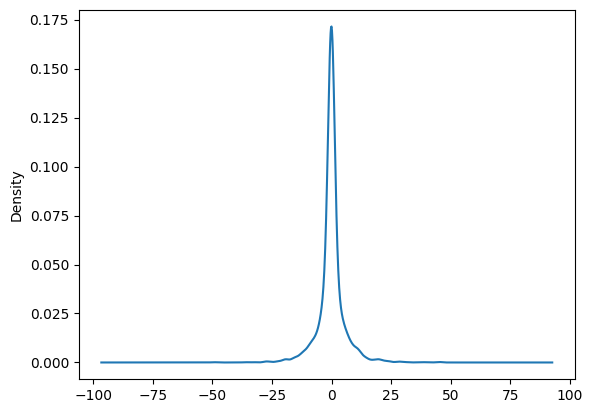

In [ ]:
results.resid.plot(kind="density")

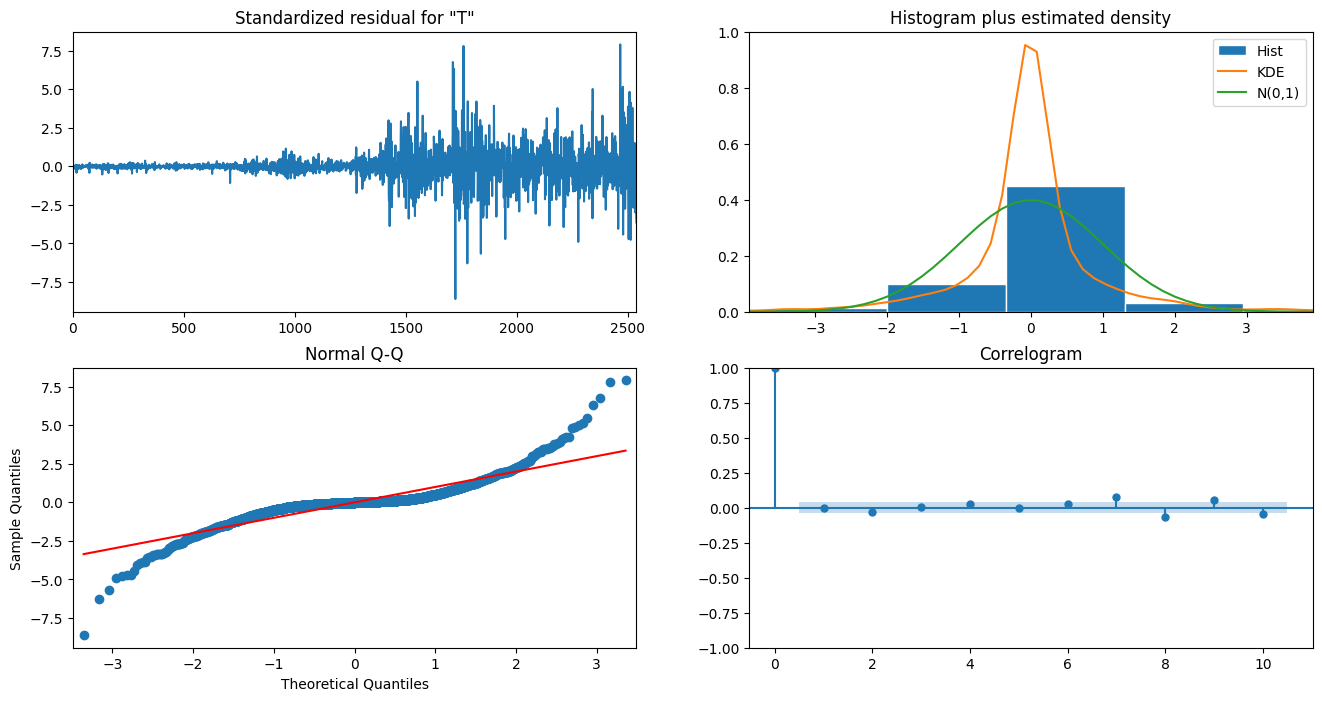

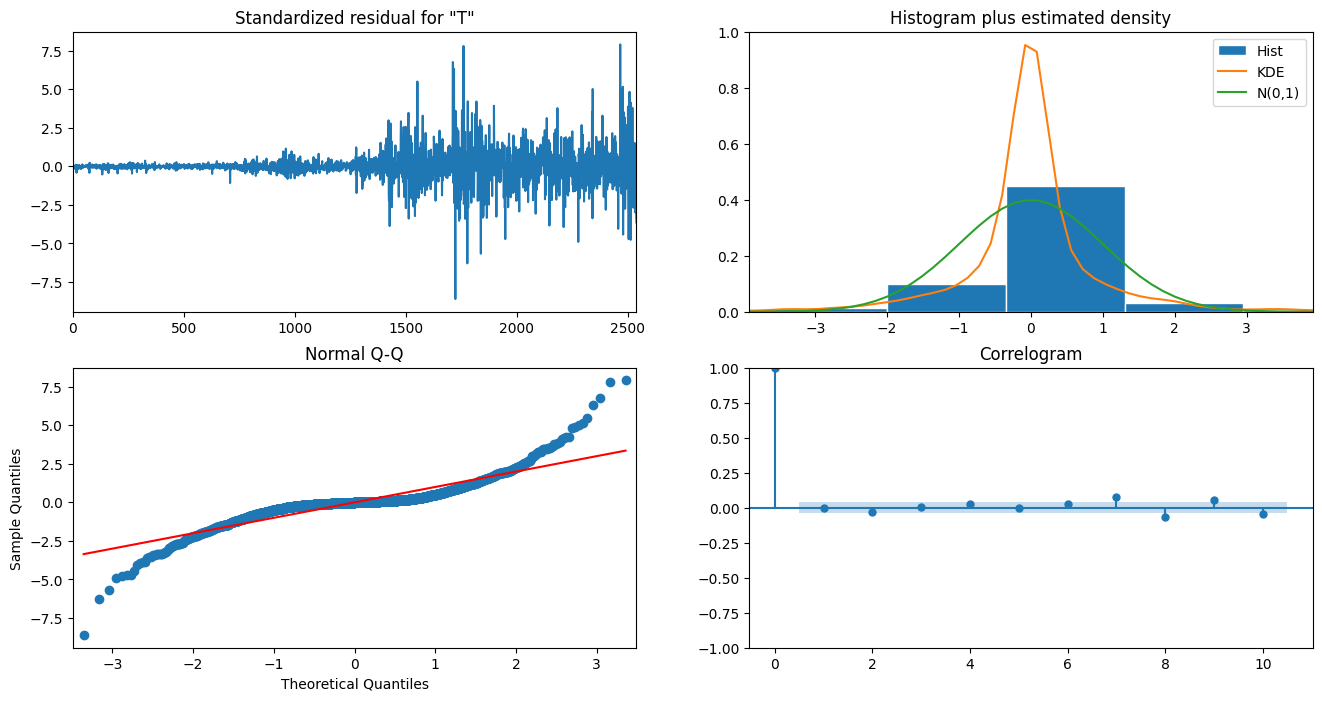

In [ ]:
results.plot_diagnostics(figsize=(16,8))

In [ ]:
# Faire une pr√©diction sur toute la s√©rie )
# Ici, on suppose que exog a la m√™me longueur que target
predictions = results.forecast(steps=len(exog), start_index=target.index[0], exog=exog)
predictions


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['start_index']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2543      5.209112
2544      4.651778
2545      3.980196
2546      4.035394
2547      4.172547
           ...    
5101    286.457819
5102    287.601962
5103    276.175326
5104    277.256238
5105    284.534772
Name: predicted_mean, Length: 2563, dtype: float64

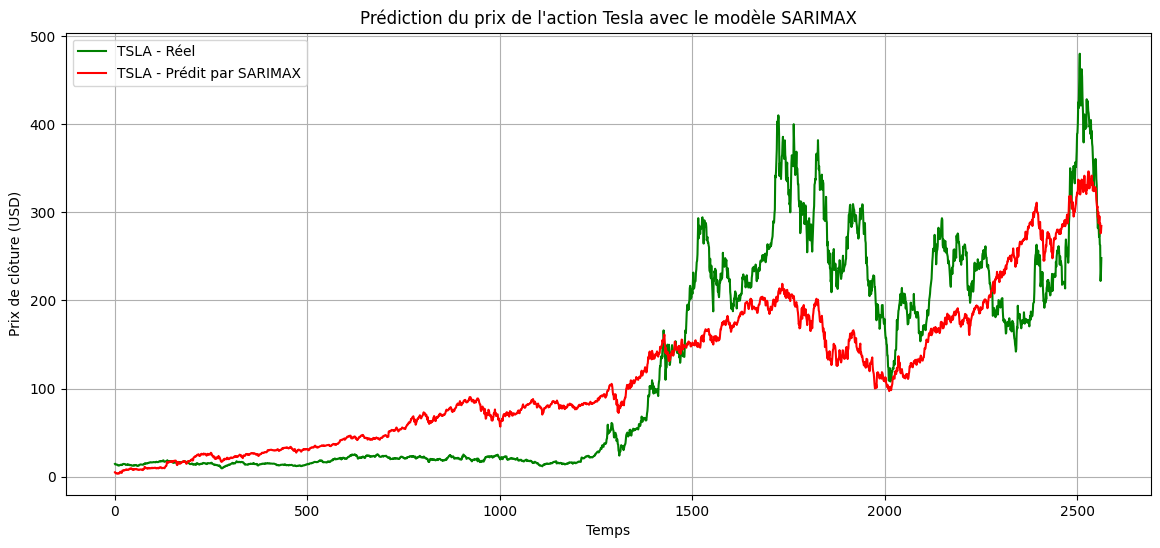

In [ ]:
# Stocker les pr√©dictions
yhatsarimax = predictions

# Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(target.values, label='TSLA - R√©el', color='green')
plt.plot(predictions.values, label='TSLA - Pr√©dit par SARIMAX', color='red')

plt.ylabel('Prix de cl√¥ture (USD)')
plt.xlabel('Temps')
plt.title("Pr√©diction du prix de l'action Tesla avec le mod√®le SARIMAX")
plt.legend(loc='best')
plt.grid()
plt.show()


La ligne verte repr√©sente le prix r√©el de l'action Tesla au fil du temps.

La ligne rouge montre les prix pr√©dits par le mod√®le SARIMAX.

le mod√®le SARIMAX semble capter la tendance g√©n√©rale du prix de l'action Tesla, mais il a du mal √† pr√©dire les fluctuations √† court terme et sous-estime parfois le prix r√©el.

On peut √©galement remarquer que le mod√®le a du mal √† pr√©dire les pics et les creux du prix de l'action. Dans les p√©riodes de forte volatilit√©, avec des variations rapides et importantes du prix, le mod√®le SARIMAX semble moins performant. Il lisse les variations et ne parvient pas √† capturer les mouvements brusques.

In [ ]:
st.shapiro(results.resid)[1]

AttributeError: 'dict' object has no attribute 'resid'

#### Performance du mod√®le

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# On r√©cup√®re les n derni√®res valeurs r√©elles et pr√©dites
y_pred5 = predictions.values[-n:]  # Pr√©dictions des n derniers jours/mois
y_true5 = target.values[-n:]       # Valeurs r√©elles correspondantes

# Calcul des m√©triques
mae = mean_absolute_error(y_true5, y_pred5)
mse = mean_squared_error(y_true5, y_pred5)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true5 - y_pred5) / y_true5)) * 100  # attention ici, divise par y_true5

# Affichage des r√©sultats
print('MAE  =', mae)    # Erreur absolue moyenne
print('MSE  =', mse)    # Erreur quadratique moyenne
print('RMSE =', rmse)   # Racine de l'erreur quadratique
print('MAPE =', mape, '%')  # Erreur relative en pourcentage
print('_________________________________________')
print(f"Pr√©cision du mod√®le SARIMAX : {100 - mape:.2f} %")

MAE  = 23.074792148797485
MSE  = 697.8893248951799
RMSE = 26.41759498696238
MAPE = 8.082722976992489 %
_________________________________________
Pr√©cision du mod√®le SARIMAX : 91.92 %


#### Intervalle de confiance

In [ ]:
# Obtenir les pr√©dictions avec les intervalles de confiance
predictions = results.get_forecast(steps=n, exog=exog_test).summary_frame()

# Aligner les index : on utilise les m√™mes que pour exog_test
predictions.index = exog_test.index

# Ajouter les valeurs r√©elles de Tesla (prix de cl√¥ture)
predictions["reel"] = target[-n:].values

# Afficher le DataFrame final
predictions


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


TSLA_Close                       mean    mean_se  mean_ci_lower  \
Date                                                              
2025-02-12 00:00:00-05:00  323.889099   5.726824     312.664730   
2025-02-13 00:00:00-05:00  328.736110   8.098952     312.862455   
2025-02-14 00:00:00-05:00  328.837953   9.919150     309.396776   
2025-02-18 00:00:00-05:00  326.767304  11.453648     304.318566   
2025-02-19 00:00:00-05:00  327.676458  12.805568     302.578006   
2025-02-20 00:00:00-05:00  325.120202  14.027797     297.626225   
2025-02-21 00:00:00-05:00  314.588302  15.151752     284.891413   
2025-02-24 00:00:00-05:00  309.526820  16.197905     277.779510   
2025-02-25 00:00:00-05:00  305.099383  17.180472     271.426276   
2025-02-26 00:00:00-05:00  306.762084  18.109808     271.267512   
2025-02-27 00:00:00-05:00  294.303153  18.993727     257.076132   
2025-02-28 00:00:00-05:00  300.388870  19.838301     261.506515   
2025-03-03 00:00:00-05:00  287.601960  20.648358     247.131922   
2025-03-04 00:00:00-05:00  290.420791  21.427814     248.423047   
2025-03-05 00:00:00-05:00  295.605787  22.179894     252.133992   
2025-03-06 00:00:00-05:00  286.457819  22.907297     241.560343   
2025-03-07 00:00:00-05:00  287.601962  23.612301     241.322703   
2025-03-10 00:00:00-04:00  276.175326  24.296857     228.554361   
2025-03-11 00:00:00-04:00  277.256238  24.962648     228.330348   
2025-03-12 00:00:00-04:00  284.534772  25.611136     234.337867   

TSLA_Close                 mean_ci_upper        reel  
Date                                                  
2025-02-12 00:00:00-05:00     335.113469  336.510010  
2025-02-13 00:00:00-05:00     344.609765  355.940002  
2025-02-14 00:00:00-05:00     348.279130  355.839996  
2025-02-18 00:00:00-05:00     349.216042  354.109985  
2025-02-19 00:00:00-05:00     352.774910  360.559998  
2025-02-20 00:00:00-05:00     352.614179  354.399994  
2025-02-21 00:00:00-05:00     344.285192  337.799988  
2025-02-24 00:00:00-05:00     341.274130  330.529999  
2025-02-25 00:00:00-05:00     338.772490  302.799988  
2025-02-26 00:00:00-05:00     342.256655  290.799988  
2025-02-27 00:00:00-05:00     331.530174  281.950012  
2025-02-28 00:00:00-05:00     339.271225  292.980011  
2025-03-03 00:00:00-05:00     328.071999  284.649994  
2025-03-04 00:00:00-05:00     332.418534  272.040009  
2025-03-05 00:00:00-05:00     339.077581  279.100006  
2025-03-06 00:00:00-05:00     331.355295  263.450012  
2025-03-07 00:00:00-05:00     333.881222  262.670013  
2025-03-10 00:00:00-04:00     323.796291  222.149994  
2025-03-11 00:00:00-04:00     326.182129  230.580002  
2025-03-12 00:00:00-04:00     334.731676  248.089996

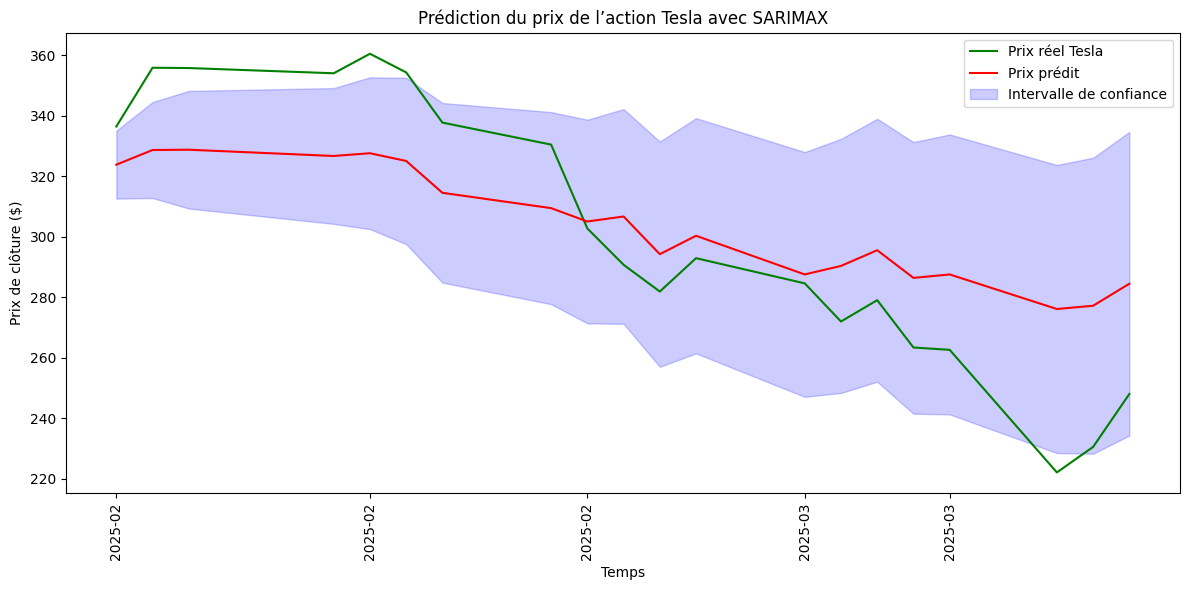

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,6)

# Tracer les prix r√©els
plt.plot(predictions[['reel']], label='Prix r√©el Tesla', color='green')

# Tracer les pr√©dictions
plt.plot(predictions[['mean']], label='Prix pr√©dit', color='red')

# Tracer l'intervalle de confiance (zone entre min et max)
plt.fill_between(predictions.index,
                 predictions['mean_ci_lower'],
                 predictions['mean_ci_upper'],
                 color='blue', alpha=0.2, label='Intervalle de confiance')

# Titres et axes
plt.ylabel('Prix de cl√¥ture ($)')
plt.xlabel('Temps')
plt.title('Pr√©diction du prix de l‚Äôaction Tesla avec SARIMAX')

# Ticks & rotation
plt.xticks(ticks=predictions.index[::4], labels=predictions.index[::4].strftime('%Y-%m'), rotation=90)

# L√©gende
plt.legend(loc='best')

# Affichage
plt.tight_layout()
plt.show()


#### Pr√©diction pour d'autres dates

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# D√©finir la cible et les exog√®nes
target = data["TSLA_Close"]
exog = data[["AMZN_Close", "GOOGL_Close", "NVDA_Close"]]

# Param√®tres de pr√©diction
n = 12  # nb d'observations qu'on garde pour test (pas utilis√© ici pour pr√©dictions futures)
NBMOIS = 24  # pr√©dictions sur les 24 mois suivants

# Cr√©ation des ensembles d'entra√Ænement
train = target.head(len(target) - n)
exog_train = exog.head(len(target) - n)

# Param√®tres SARIMAX optimaux (√† adapter si besoin)
p, d, q = 0, 1, 0
P, D, Q, s = 0, 0, 0, 21



In [ ]:
# √âtape 1 : Pr√©dire les futures valeurs exog√®nes
predicted_exog = {}
for var in exog.columns:
    print(f"Training SARIMAX for {var}...")

    model_exog = SARIMAX(exog_train[var],
                         order=(p, d, q),
                         seasonal_order=(P, D, Q, s))

    results_exog = model_exog.fit(disp=False)
    predicted_exog[var] = results_exog.forecast(steps=NBMOIS)

# Convertir en DataFrame
predicted_exog_df = pd.DataFrame(predicted_exog)



Training SARIMAX for AMZN_Close...
Training SARIMAX for GOOGL_Close...
Training SARIMAX for NVDA_Close...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/

In [ ]:
# √âtape 2 : Mod√®le SARIMAX principal pour Tesla
print("Training SARIMAX for Tesla...")

model_tsla = SARIMAX(train,
                     exog=exog_train,
                     order=(p, d, q),
                     seasonal_order=(P, D, Q, s))

results_tsla = model_tsla.fit(disp=False)

Training SARIMAX for Tesla...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# √âtape 3 : Pr√©diction du prix Tesla sur 24 mois
predictions = results_tsla.forecast(steps=NBMOIS, exog=predicted_exog_df)

# R√©sultat
print("Pr√©dictions futures sur 24 mois :")
print(predictions)


Pr√©dictions futures sur 24 mois :
2551    330.529999
2552    330.529999
2553    330.529999
2554    330.529999
2555    330.529999
2556    330.529999
2557    330.529999
2558    330.529999
2559    330.529999
2560    330.529999
2561    330.529999
2562    330.529999
2563    330.529999
2564    330.529999
2565    330.529999
2566    330.529999
2567    330.529999
2568    330.529999
2569    330.529999
2570    330.529999
2571    330.529999
2572    330.529999
2573    330.529999
2574    330.529999
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### Visualisation des pr√©duction

## 4. Mod√®le Facebook Prophet


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphexthjzo/5yyqfmmu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphexthjzo/32qf7q25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84088', 'data', 'file=/tmp/tmphexthjzo/5yyqfmmu.json', 'init=/tmp/tmphexthjzo/32qf7q25.json', 'output', 'file=/tmp/tmphexthjzo/prophet_modelrwtd6ti_/prophet_model-20250414192708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:27:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:27:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, 

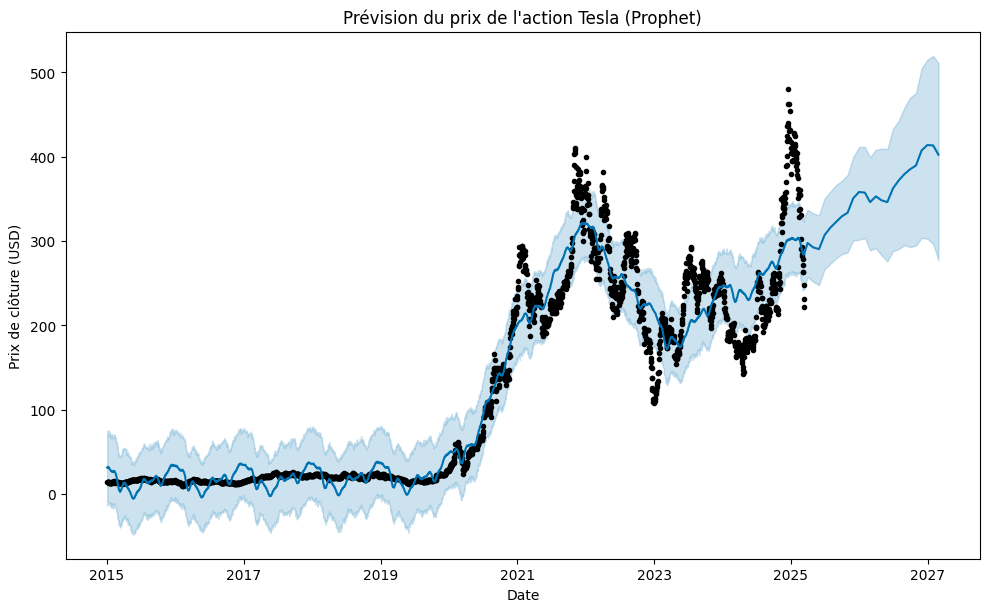

In [ ]:


# R√©initialiser l'index pour que la date soit une colonne
df_prophet = data.reset_index()[['Date', 'TSLA_Close']].copy()

# Renommer les colonnes comme attendu par Prophet
df_prophet.rename(columns={'Date': 'ds', 'TSLA_Close': 'y'}, inplace=True)

# S'assurer que les dates sont bien en format datetime et supprimer le fuseau horaire
df_prophet['ds'] = pd.to_datetime(df_prophet['ds']).dt.tz_localize(None) #This line removes the timezone

# Cr√©er et entra√Æner le mod√®le Prophet
model = Prophet()
model.fit(df_prophet)

# Cr√©er les futures dates √† pr√©dire (24 mois dans le futur)
future = model.make_future_dataframe(periods=24, freq='M')

# Pr√©diction
forecast = model.predict(future)

# Visualisation
fig = model.plot(forecast)
plt.title("Pr√©vision du prix de l'action Tesla (Prophet)")
plt.xlabel("Date")
plt.ylabel("Prix de cl√¥ture (USD)")
plt.grid()
plt.show()

Le graphique montre les r√©sultats de la pr√©vision du prix de l'action Tesla r√©alis√©e avec le mod√®le Prophet. Sur ce graphique, les points noirs correspondent aux valeurs r√©elles du prix de cl√¥ture de l'action Tesla au fil du temps. La ligne bleue repr√©sente les pr√©dictions du mod√®le, c‚Äôest-√†-dire ce qu‚Äôil estime comme prix futur de l‚Äôaction. Autour de cette ligne, on voit une zone bleue claire qui correspond √† l‚Äôintervalle de confiance. Cela signifie que, selon le mod√®le, il est tr√®s probable que le vrai prix se trouve √† l‚Äôint√©rieur de cette zone.

En regardant le graphique, on peut voir que le mod√®le Prophet suit plut√¥t bien la tendance g√©n√©rale du prix de Tesla. La courbe bleue suit les mouvements principaux des points noirs, ce qui montre que le mod√®le capte bien la direction du march√©. Toutefois, il y a des moments o√π la pr√©diction s‚Äô√©loigne de la r√©alit√©, ce qui indique que le mod√®le peut parfois manquer de pr√©cision.

On remarque aussi que la zone d‚Äôincertitude devient plus large lorsque le march√© est instable. Cela refl√®te le fait que le mod√®le est moins s√ªr de ses pr√©dictions lorsqu‚Äôil y a beaucoup de variations impr√©vues.

En conclusion, Prophet est un bon outil pour estimer la tendance g√©n√©rale du prix de l‚Äôaction Tesla sur le long terme. Cependant, comme tous les mod√®les, il a des limites, notamment pour pr√©voir les changements brusques ou les √©v√©nements exceptionnels du march√©.

## 5. Mod√®le LSTM

In [ ]:

# 1. Pr√©paration des donn√©es (en supposant que 'data' et 'features' sont d√©finis comme dans le code pr√©c√©dent)
features = ['TSLA_Close', 'AMZN_Close', 'GOOGL_Close', 'NVDA_Close']
data = data[features].dropna()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 2. Cr√©ation des s√©quences (fen√™tres glissantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 0])  # TSLA_Close est la 1√®re colonne
    return np.array(X), np.array(y)

SEQ_LEN = 60  # par exemple, 60 jours
X, y = create_sequences(scaled_data, SEQ_LEN)

# 3. Split train/test
split = int(len(X) * 0.9)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 4. Construction du mod√®le LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm_3 (LSTM)                   ‚îÇ (None, 60, 50)         ‚îÇ        11,000 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ (None, 60, 50)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_4 (LSTM)                   ‚îÇ (None, 50)             ‚îÇ        20,200 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_4 (Dropout)             ‚îÇ (None, 50)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            51 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 5. Entra√Ænement
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# 6. Pr√©dictions
predictions = model.predict(X_test)




Epoch 1/15
71/71 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 71ms/step - loss: 0.0032 - val_loss: 0.0216
Epoch 2/15
71/71 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 53ms/step - loss: 0.0018 - val_loss: 0.0202
Epoch 3/15
71/71 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 54ms/step - loss: 0.0025 - val_loss: 0.0360
Epoch 4/15
71/71 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 72ms/step - loss: 0.0048 - val_loss: 0.0353
Epoch 5/15
71/71 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 52ms/step - loss: 0.0032 - val_loss: 0.0504
Epoch 6/15
71/71 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 53ms/step - loss: 0.0027 - val_loss: 0.0748
Epoch 7/15
71/71 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 67ms/step - loss: 0.0022 - val_loss: 0.0653
Epoch 8/15
71/71 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 53ms/step - loss: 9.5418e-04 - val_loss: 0.0

In [ ]:
# 7. Inverse scaling
predicted_prices = scaler.inverse_transform(np.hstack((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1]-1)))))[:,0]
real_prices = scaler.inverse_transform(np.hstack((y_test.reshape(-1,1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1)))))[:,0]

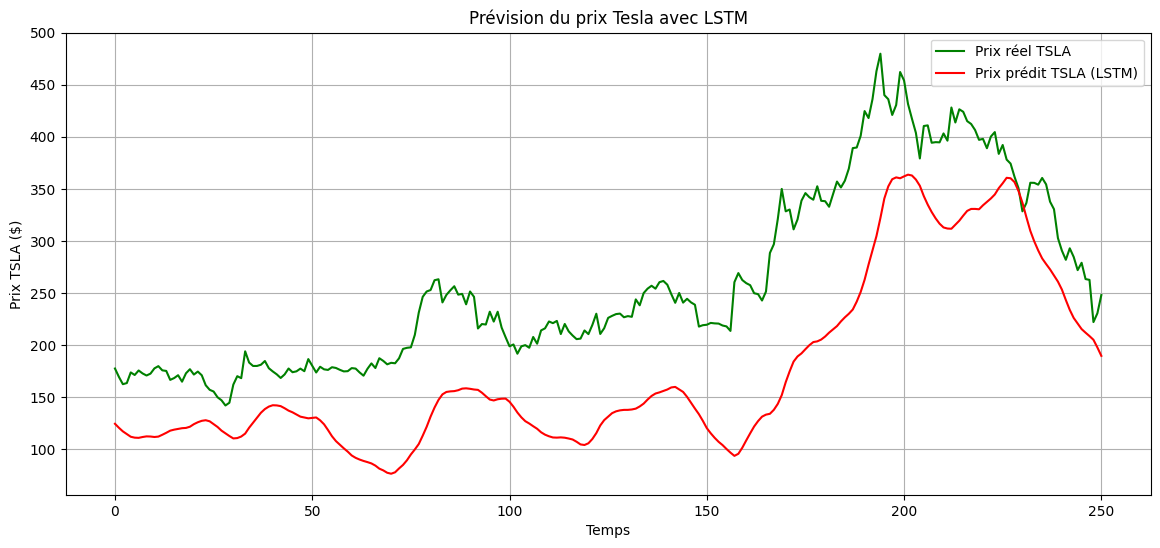

In [ ]:
# 8. Visualisation
plt.figure(figsize=(14,6))
plt.plot(real_prices, color='green', label='Prix r√©el TSLA')
plt.plot(predicted_prices, color='red', label='Prix pr√©dit TSLA (LSTM)')
plt.title("Pr√©vision du prix Tesla avec LSTM")
plt.xlabel("Temps")
plt.ylabel("Prix TSLA ($)")
plt.legend()
plt.grid()
plt.show()

Le graphique montre la pr√©diction du prix de l‚Äôaction Tesla faite avec un mod√®le LSTM. La ligne verte correspond au prix r√©el, tandis que la ligne rouge montre la pr√©diction du mod√®le.

On remarque que la courbe rouge est plus lisse que la courbe verte. Cela signifie que le mod√®le LSTM a parfois du mal √† suivre les variations rapides du prix r√©el. Il r√©agit souvent avec un petit retard, ce qui fait que les hausses ou les baisses soudaines ne sont pas bien reproduites imm√©diatement.

Il arrive aussi que la pr√©diction soit un peu trop basse ou trop haute par rapport au prix r√©el. Malgr√© ces limites, le mod√®le parvient quand m√™me √† suivre la tendance g√©n√©rale du march√©.

En r√©sum√©, le LSTM est capable d‚Äôindiquer dans quelle direction √©volue le prix de Tesla, mais il est moins pr√©cis pour pr√©voir les changements brusques √† court terme.

In [ ]:


def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R-squared: {r2:.2f}")


evaluate_model(y_true5, y_pred5, "SARIMAX")


y_true = data['TSLA_Close'][-len(forecast['yhat']):]
y_pred_prophet = forecast['yhat'][-len(y_true):]
evaluate_model(y_true, y_pred_prophet, "Prophet")

evaluate_model(real_prices, predicted_prices, "LSTM")

SARIMAX:
  MAE: 23.07
  RMSE: 26.42
  R-squared: 0.63
Prophet:
  MAE: 24.10
  RMSE: 35.14
  R-squared: 0.91
LSTM:
  MAE: 84.45
  RMSE: 92.27
  R-squared: -0.14


* **R¬≤¬†:** Prophet pr√©sente un R¬≤ significativement plus √©lev√© (0,91) que SARIMAX (0,63) et LSTM (-0,14). Le R¬≤ mesure la proportion de variance de la variable d√©pendante qui est pr√©visible √† partir des variables ind√©pendantes. Un R¬≤ √©lev√© indique g√©n√©ralement un meilleur ajustement. Un R¬≤ n√©gatif pour LSTM sugg√®re que le mod√®le est moins performant qu'une simple ligne horizontale.

* **MAE et RMSE¬†:** Bien que Prophet pr√©sente un MAE l√©g√®rement sup√©rieur (24,10) √† celui de SARIMAX (23,07), son RMSE (35,14) reste consid√©rablement inf√©rieur au RMSE du LSTM (92,27). Les indicateurs d'erreur du LSTM sont nettement plus importants, ce qui indique des pr√©dictions nettement moins pr√©cises. Bien que la diff√©rence de MAE soit moins significative, la diff√©rence substantielle de RMSE (et un R^2 n√©gatif) sugg√®re que Prophet est le mod√®le le plus performant.

En r√©sum√©, le mod√®le Prophet pr√©sente le pouvoir pr√©dictif le plus √©lev√© parmi les trois, d'apr√®s les indicateurs d'√©valuation fournis. Le R¬≤ n√©gatif et les valeurs MAE/RMSE tr√®s √©lev√©es du mod√®le LSTM sugg√®rent un probl√®me important de conception ou d'apprentissage du mod√®le.

# PARTIE C : D√âPLOIEMENT DU MOD√àLE

In [ ]:

import pickle


filename = 'prophet_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)
